# Decord AVReader Example

In [1]:
%matplotlib inline
import sys, os
sys.path.insert(0, os.path.abspath('../python'))
import decord as de
import simpleaudio as sa
from matplotlib import pyplot as plt
import numpy as np

### This example provides a short video clips of me counting from one to five in a random pace :)

In [2]:
ctx = de.cpu(0)
video_file = 'count.mov'
# Frames corresponding to me counting each number is set manually
count_one = (10, 23)
count_two = (46, 57)
count_three = (66, 78)
count_four = (102, 114)
count_five = (121, 130)

### Read in the file is simple. You can also specify sample rate for the audio or parameter for the video just as you did for the Video Reader

In [3]:
av = de.AVReader(video_file, ctx, sample_rate=22050) # We take 22050 sample rate here just for demonstration

### Accessing av reader is easy
Simply slice it in a pythonic way with the **frames** you want. Both the video frames and the audio corresponding to those frames will be returned as a tuple in the format (audio, video)
**Audio samples will be returned in a list as the number of samples corresponding to each frame might not be the same**

In [4]:
audio, video = av[count_one[0]:count_one[1]]
print('Frame #: ', len(audio))
print('Shape of the audio samples of the first frame: ', audio[0].shape)
print('Shape of the first frame: ', video.asnumpy()[0].shape)

Frame #:  13
Shape of the audio samples of the first frame:  (1, 1360)
Shape of the first frame:  (720, 1080, 3)


#### Of course, decoding file-like object in memory is a handy feature of `decord`

In [5]:
with open(video_file, 'rb') as f:
    av = de.AVReader(f, ctx, sample_rate=22050)
    audio, video = av[count_one[0]:count_one[1]]
    print('Frame #: ', len(audio))
    print('Shape of the audio samples of the first frame: ', audio[0].shape)
    print('Shape of the first frame: ', video.asnumpy()[0].shape)

Frame #:  13
Shape of the audio samples of the first frame:  (1, 1360)
Shape of the first frame:  (720, 1080, 3)


In [6]:
# simple function showing the video frames and play the audio
def play(audio, video):
    for frame in video.asnumpy():
        plt.imshow(frame)
        plt.show()
    buffer = np.array([], dtype='float32')
    for samples in audio:
        buffer = np.append(buffer, samples.asnumpy())
    player = sa.play_buffer(buffer, 1, 4, 22050)
    player.wait_done()

### Here is me counting ONE

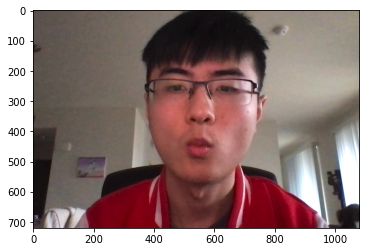

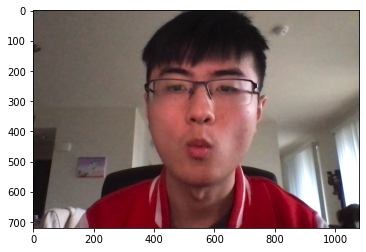

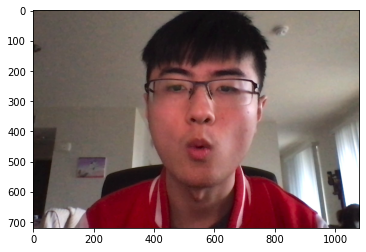

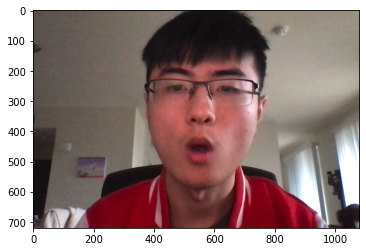

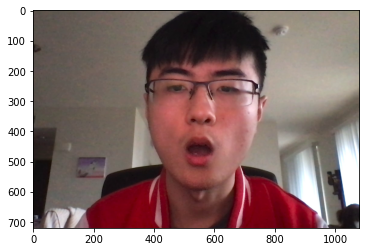

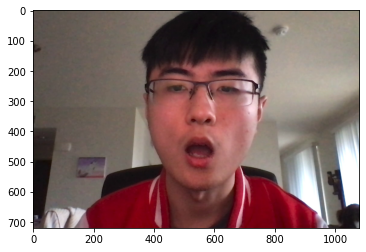

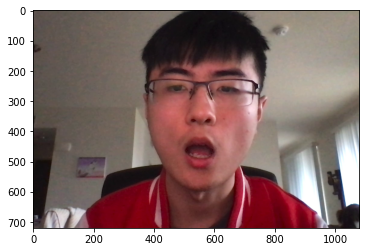

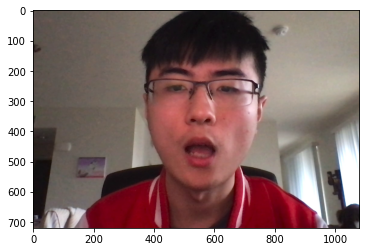

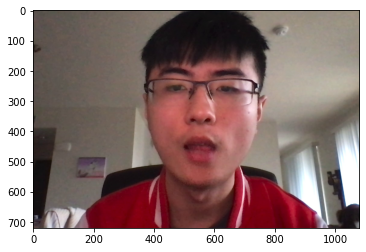

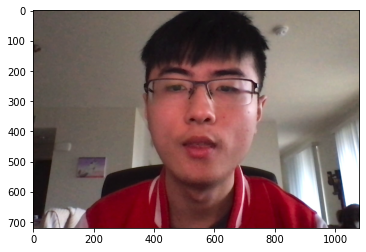

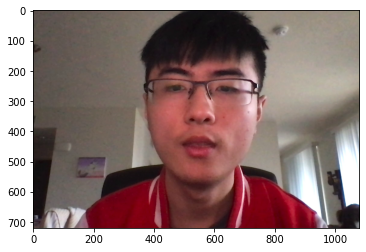

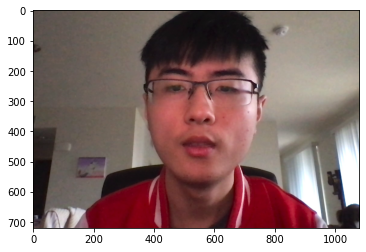

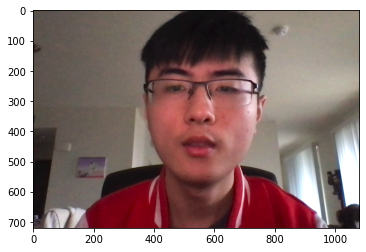

In [7]:
play(audio, video)

### And couting FOUR

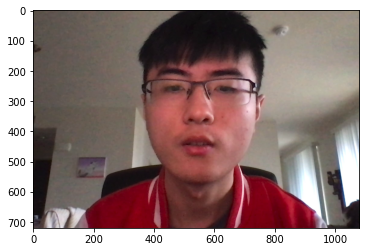

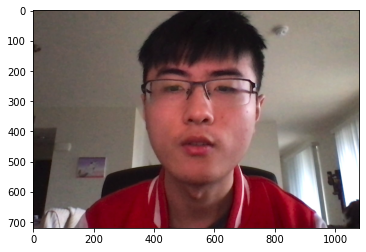

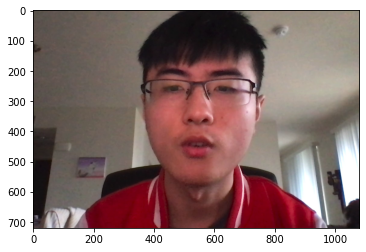

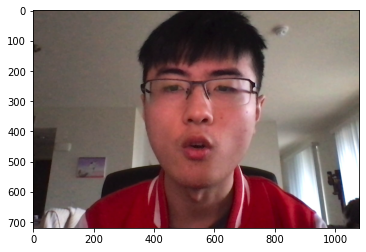

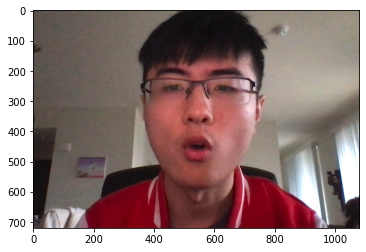

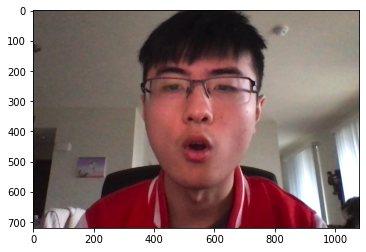

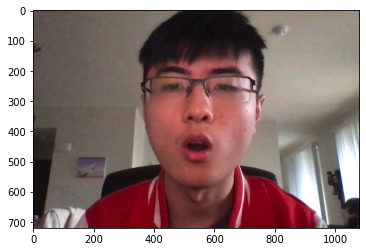

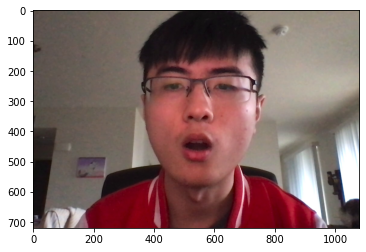

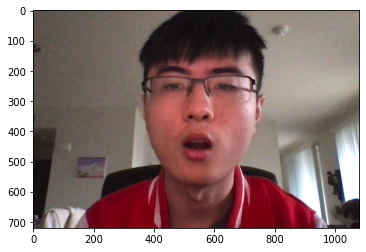

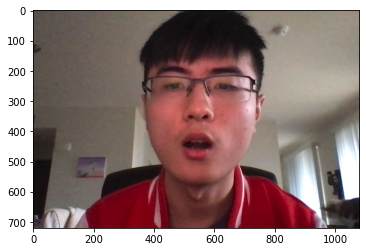

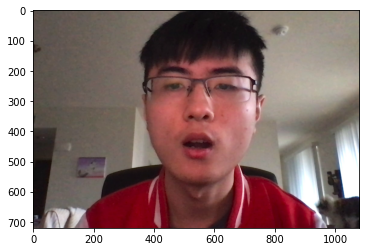

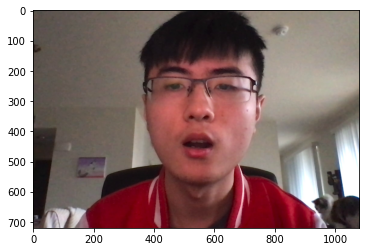

In [8]:
audio4, video4 = av[count_four[0]:count_four[1]]
play(audio4, video4)

### Feel free to try out other clips as well